In [2]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
palette = ["#F72585", "#4CC9F0"]

def fix_col(col):
    return col.map(lambda x: float(x.replace(",", ".")))

def prepare_data(data, address_space):
    data = data.copy()
    data["throughput"] = fix_col(data["throughput"])
    data["latency"] = fix_col(data["latency"]) * 1e-3
    data["customer_share"] = fix_col(data["customer_share"])
    data["success_rate"] = fix_col(data["success_rate"])
    data["address_space"] = address_space
    return data

In [4]:
same_data = pandas.read_csv("experiment_same_address.csv", sep=";")
same_data = prepare_data(same_data, address_space="same")
different_data = pandas.read_csv("experiment_different_address.csv", sep=";")
different_data = prepare_data(different_data, address_space="across")
data = pandas.concat([same_data, different_data])

In [5]:
data

,n_threads,throughput,latency,customer_share,success_rate,address_space
0,1,3041.254218,0.328812,0.591500,1.0,same
1,1,2924.052317,0.341991,0.618000,1.0,same
2,1,2674.352685,0.373922,0.603000,1.0,same
3,1,2598.287399,0.384869,0.591000,1.0,same
4,1,2886.602408,0.346428,0.608500,1.0,same
...,...,...,...,...,...,...
45,1000,419.546281,2383.885236,0.599704,1.0,across
46,1000,423.158041,2363.297273,0.600068,1.0,across
47,1000,439.097037,2277.522131,0.600374,1.0,across
48,1000,403.452441,2478.991555,0.600338,1.0,across


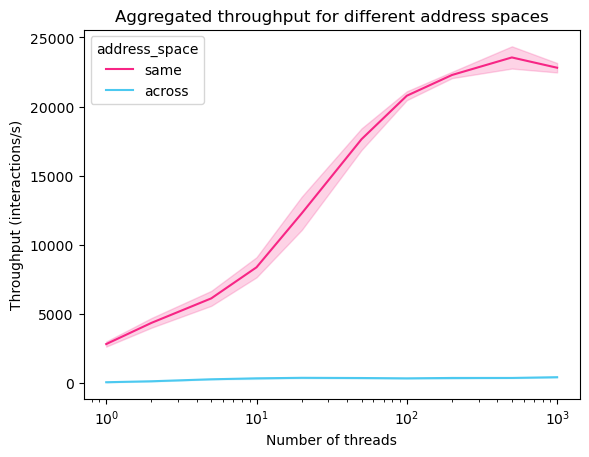

In [7]:
# Create seaborn plot of the data, with x axis being n_threads and y being throughput. let the line be mean and create standard deviation around the line. Let the color be address_space. Let the title be "Throughput for different address spaces", the xlabel be "Number of threads", and the y label be "Throughput (successful interactions per second). The x axis should be in log scale."
sns.lineplot(data=data, x="n_threads", y="throughput", hue="address_space", errorbar="sd", palette=palette)
plt.title("Aggregated throughput for different address spaces")
plt.xlabel("Number of threads")
plt.ylabel("Throughput (interactions/s)")
plt.xscale("log")
plt.savefig("../plots/throughput_all.png", dpi=300, bbox_inches="tight")
plt.show()

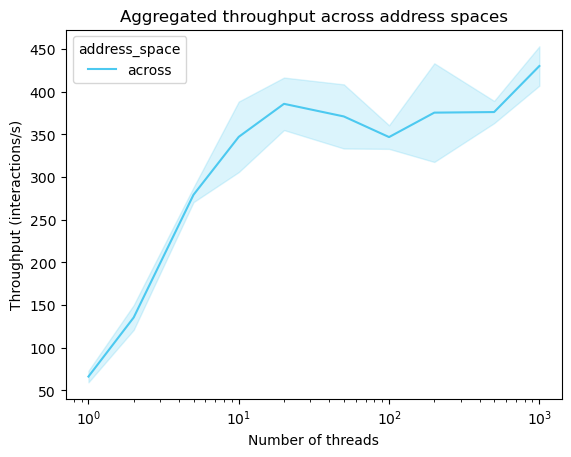

In [59]:
# Plot a similar plot, but without the "same" address space value. Set the starting color to be the second color from the Set2 palette.
sns.lineplot(data=data[data["address_space"] == "across"], x="n_threads", y="throughput", hue="address_space", errorbar="sd", palette=palette, hue_order=["", "across"])
plt.title("Aggregated throughput across address spaces")
plt.xlabel("Number of threads")
plt.ylabel("Throughput (interactions/s)")
plt.xscale("log")
plt.savefig("../plots/throughput_diff.png", dpi=300, bbox_inches="tight")
plt.show()

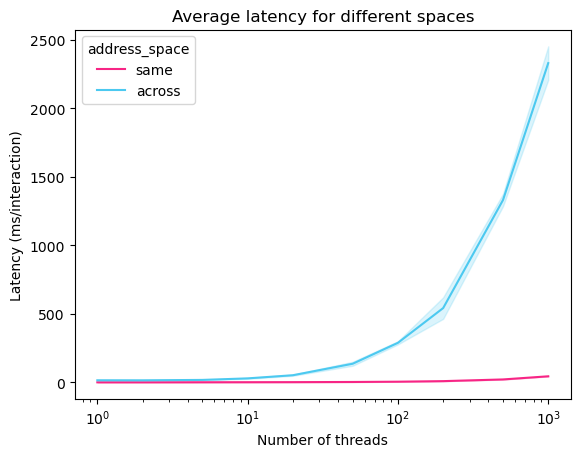

In [62]:
# Plot the same data as in the beginning, but with latency on y axis.
sns.lineplot(data=data, x="n_threads", y="latency", hue="address_space", errorbar="sd", palette=palette)
plt.title("Average latency for different spaces")
plt.xlabel("Number of threads")
plt.ylabel("Latency (ms/interaction)")
plt.xscale("log")
plt.savefig("../plots/latency_all.png", dpi=300, bbox_inches="tight")
plt.show()

/var/folders/x6/3czp1q112kn2rnk_rm7mbbt00000gn/T/ipykernel_63951/2525886120.py:2: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=data[data["address_space"] == "same"], x="n_threads", y="latency", hue="address_space", errorbar="sd", palette=palette)


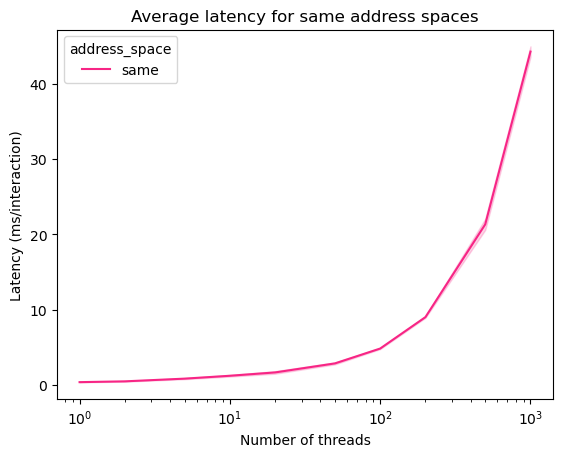

In [57]:
# Plot the same data as above, but with the "same" address space value removed.
sns.lineplot(data=data[data["address_space"] == "same"], x="n_threads", y="latency", hue="address_space", errorbar="sd", palette=palette)
plt.title("Average latency for same address spaces")
plt.xlabel("Number of threads")
plt.ylabel("Latency (ms/interaction)")
plt.xscale("log")
plt.savefig("../plots/latency_same.png", dpi=300, bbox_inches="tight")
plt.show()

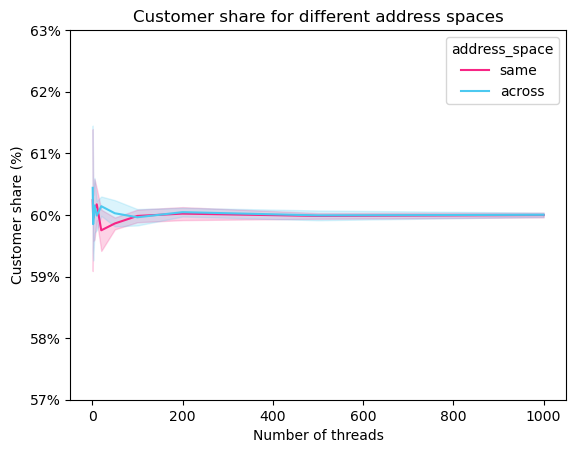

In [13]:
# Create a line plot of the customer_share AND success_rate for the different address spaces. All the same settings as previously will apply here as well.
sns.lineplot(data=data, x="n_threads", y="customer_share", hue="address_space", errorbar="sd", palette=palette)
plt.title("Customer share for different address spaces")
plt.xlabel("Number of threads")
plt.ylabel("Customer share (%)")
plt.ylim([0.57, 0.63])
# Format axis to be in percentage
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x*100:.0f}%")
plt.savefig("../plots/customer_share.png", dpi=300, bbox_inches="tight")
plt.show()

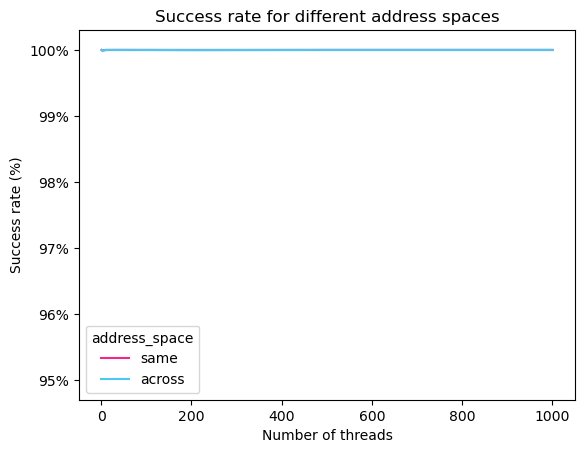

In [9]:
sns.lineplot(data=data, x="n_threads", y="success_rate", hue="address_space", errorbar="sd", palette=palette)
plt.title("Success rate for different address spaces")
plt.xlabel("Number of threads")
plt.ylabel("Success rate (%)")
# Set y axis to be in range [0.8, 1]
plt.ylim([0.947, 1.003])
# Format axis to be in percentage
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x*100:.0f}%")
plt.savefig("../plots/success_rate.png", dpi=300, bbox_inches="tight")
plt.show()